## To read the json file and it's context:

In [2]:
import json

with open("output3.json", "r", encoding='utf-8') as file:
    data = json.load(file)
file.close()

In [3]:
data_copy = data.copy

In [4]:
for item in data:
    if "tags" in item.keys():
        item["tags"] = [tag.strip("12345()") for tag in item["tags"]]

In [5]:
all_tags = list()

for item in data:
    if "tags" in item.keys():
        [all_tags.append(tag) for tag in item["tags"]]

In [6]:
all_titles = list()

for item in data:
        all_titles.append(item["title"])

len(all_titles)

266

In [7]:
all_tags = [element.strip("12345()") for element in all_tags]
len(all_tags)

1641

In [8]:
unique_tags = list(set(all_tags))
len(unique_tags)

346

In [9]:
import numpy as np
adjacency_matrix = np.zeros((len(unique_tags), len(unique_tags)))

In [10]:
tags_indices = {word:index for index, word in enumerate(unique_tags)}

## To create Adjacency Matrix:

In [11]:
for item in data:
    if "tags" in item.keys():
        for i in range(len(item["tags"])):
            for j in range(i+1, len(item["tags"])):
                tag1 = item["tags"][i]
                tag2 = item["tags"][j]
                index1 = tags_indices[tag1]
                index2 = tags_indices[tag2]
                adjacency_matrix[index1][index2] = 1
                adjacency_matrix[index2][index1] = 1

In [12]:
for item in data:
    for tag in item["tags"]:
        print(unique_tags.index(tag))

156
29
149
84
215
172
8
133
62
296
86
80
220
128
5
148
150
23
200
313
92
115
152
86
32
245
32
245
170
47
86
323
279
152
113
264
253
153
198
160
168
78
243
45
308
182
21
290
31
94
201
51
338
236
335
16
152
213
138
17
265
154
242
339
151
221
181
65
227
259
30
306
188
42
41
155
17
265
154
242
339
151
221
181
65
227
259
30
306
188
42
41
155
17
265
154
242
339
151
221
181
65
227
259
30
306
188
42
41
155
266
97
344
186
189
266
97
344
186
189
266
97
344
186
189
266
97
344
186
189
266
97
344
186
189
311
314
171
65
167
187
141
328
118
187
141
328
118
42


KeyError: 'tags'

In [13]:
file_path = 'adjacency_matrix.txt'
np.savetxt(file_path, adjacency_matrix, fmt='%d')

## To export the graph:

In [14]:
from igraph import Graph
from igraph import plot

graph = Graph.Read_Adjacency("adjacency_matrix.txt")
graph.vs["name"] = unique_tags
graph.vs["label"] = unique_tags

In [15]:
graph.vs["label"]

['یادگیری سازمانی',
 'کاهش نویز',
 'برنامه\u200cریزی دو سطحی',
 'تومور',
 'تصور از ریسک خرید',
 'سامانه اتوبوس\u200cرانی',
 'وام های شرکتی',
 'علم داده',
 'قابلیت',
 'اینترنت اشیا',
 'شرکت ملی مس ایران',
 'برنامه ی وفاداری',
 'تشخیص زبان توهین آمیز',
 'الگوریتم الکترومغناطیس',
 'توسعه نرم افزار',
 'مسئله کارگزاری',
 'hotel',
 'فناوری اطلاعات',
 ' صنعت فولاد',
 'فرایند تحلیل سلسله مراتبی',
 'تعمیرات پیشگیرانه کارآیی تجهیزات',
 'داده کاوی',
 'پیاده\u200cسازی',
 'شبکه عصبی مصنوعی',
 'زنجیره ی بلوکی',
 'رقابت',
 'بنگاه به بنگاه',
 'ریسک اعتباری',
 'فرآیندهای کسب و کار',
 'کارآیی فنی',
 'Reservation system',
 'زندگی شخصی',
 'رایانش مشبک',
 'مدل سازی معادلات ساختاری',
 'شبکه برهم کنش پروتئین-پروتئین',
 'مهندسی',
 'شناسایی موانع',
 'سازماندهی مجدد',
 'سیستم مدیریت شکایات مشتری',
 'انتقال دانش',
 'توموگرافی',
 'electronic commerce',
 'تجارت الکترونیکی',
 'عملکرد سازمان',
 'مدیریت دانش',
 'حوادث ترافیکی',
 'مدل پذیرش فناوری',
 'بانک کشاورزی',
 'فناوری جدید',
 'الگوریتم شبه-الکترومغناطیس',
 'فضا

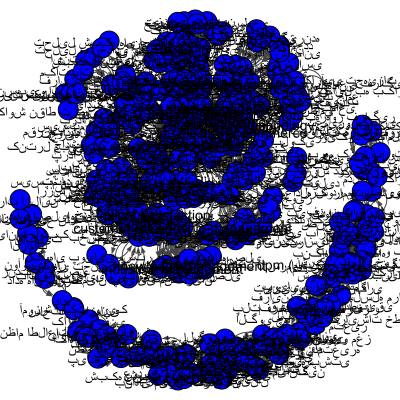

In [16]:
layout = graph.layout("kk")
visual_style = {"vertex_color": "blue", "vertex_size": 20, "vertex_label": graph.vs["name"], "edge_arrow_size": 0.5}

plot(graph, "graph.png", layout=layout, bbox=(400, 400), **visual_style)

شکل تمیزتر در گفی ترسیم شده‌است.

In [17]:
degree_centrality = graph.degree()
graph.vs["degree_centrality"] = degree_centrality
file_path = "graph.graphml"
graph.write_graphml(file_path)

## To draw the Bipartite Graph of papers and their tags:

In [18]:
# title_indices = {title:index for index,title in enumerate(all_titles)}
edge_list = np.zeros((len(all_tags), 2))
counter = 0
for index, item in enumerate(data):
    if "tags" in item.keys():
        for tag in item["tags"]:
            edge_list[counter][0] = index
            edge_list[counter][1] = tags_indices[tag]+1000
            counter += 1

In [19]:
edge_list = edge_list.astype("int32")
edge_list

array([[   0, 1156],
       [   0, 1029],
       [   0, 1149],
       ...,
       [ 265, 1244],
       [ 265, 1256],
       [ 265, 1110]])

In [20]:
file_path = 'bipartite_garph.txt'
np.savetxt(file_path, edge_list, fmt='%d')

##

In [21]:
bipartite_garph = Graph.Read_Edgelist("bipartite_garph.txt", directed=False)

In [73]:
layer_assignments = np.zeros(1400)
with open("bipartite_garph.txt", "r") as file:
    max = 0
    for line in file:
        layer_assignments[int(line.split()[0])] = 0
        layer_assignments[int(line.split()[1])] = 1
        # line = [int(element) for element in line.split()]


In [74]:
layer_assignments = layer_assignments.astype("int32")
layer_assignments = layer_assignments.tolist()

In [81]:
bipartite_garph.vs["layer"] = layer_assignments
layout = bipartite_garph.layout_sugiyama(layers=bipartite_garph.vs["layer"])
# layout = bipartite_garph.layout_kamada_kawai()
visual_style = {"vertex_color": "blue", "vertex_size": 20, "vertex_label": graph.vs["name"], "edge_arrow_size": 0.5}
plot(bipartite_garph, layout=layout, bbox=(700, 200), **visual_style)